# 2. Regresion lineal B. Anlálisis de calidad en muestras de vino

In [14]:
import numpy as np
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt


## 1. Extracción de datos y primer análisis gráfico

In [4]:
df = pd.read_csv('files/winequality-red.csv', sep = ';')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [5]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [6]:
df.shape

(1599, 12)

In [8]:
df.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

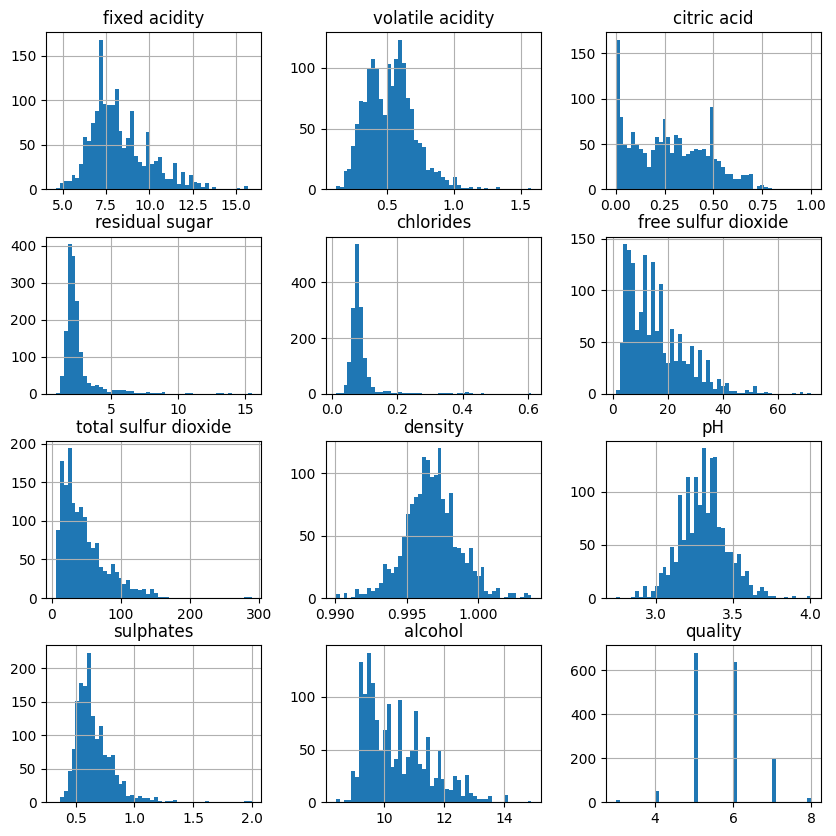

In [12]:
df.hist(bins=50, figsize=(10, 10));

In [ ]:
from pandas.plotting import scatter_matrix

attrib = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 
          'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']
scatter_matrix(df[attrib], figsize=(12, 12));

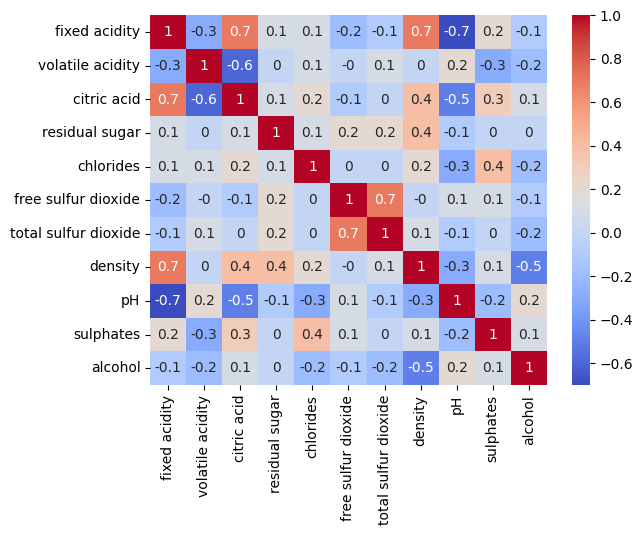

In [18]:
corrMatrix = df[attrib].corr().round(1)
sn.heatmap(corrMatrix, annot=True, cmap='coolwarm')
plt.show()

## 2. Preparación de los datos para el entrenamiento

In [19]:
#Revisar y eliminar datos  perdidos NaN
df.isnull().values.any()

False

Como no hay ningun dato faltante o con valor nulo/vacio, se hace el filtrado de datos

In [20]:
X = df.drop('quality', axis=1)
X.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4


In [23]:
y = df.quality
y.head()

0    5
1    5
2    5
3    6
4    5
Name: quality, dtype: int64

In [26]:
# Se dividen los datos para entrenamiento y prueba
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.85)

In [27]:
# Se revisa el tamaño de cada muestra
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1359, 11), (240, 11), (1359,), (240,))

## 3. Preparación de los modelos

### Regresión lineal

In [53]:
from sklearn.linear_model import LinearRegression
linear_regression = LinearRegression()

### Regresión polinomial

In [52]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

poly_reg_2 = make_pipeline(PolynomialFeatures(2), LinearRegression())
poly_reg_3 = make_pipeline(PolynomialFeatures(3), LinearRegression())

## 4. Entrenamiento de los modelos

In [54]:
linear_regression.fit(X_train, y_train)

LinearRegression()

In [55]:
poly_reg_2.fit(X_train, y_train)

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures()),
                ('linearregression', LinearRegression())])

In [56]:
poly_reg_3.fit(X_train, y_train)

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures(degree=3)),
                ('linearregression', LinearRegression())])

## 5. Evaluación de resultados

In [66]:
y_linear_predicted = linear_regression.predict(X_test).round()
y_poly2_predicted = poly_reg_2.predict(X_test).round().round()
y_poly3_predicted = poly_reg_3.predict(X_test).round().round()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


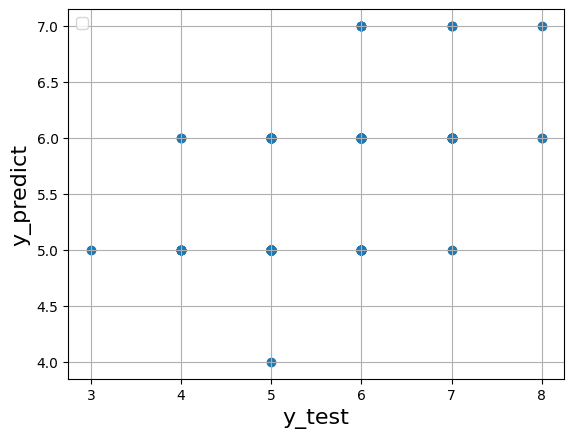

In [73]:
plt.scatter(y_test, y_linear_predicted)
plt.xlabel('y_test', fontsize = 16)
plt.ylabel("y_predict", fontsize = 16, rotation = 90)
plt.legend(loc = "upper left", fontsize = 11)
plt.grid(True)
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


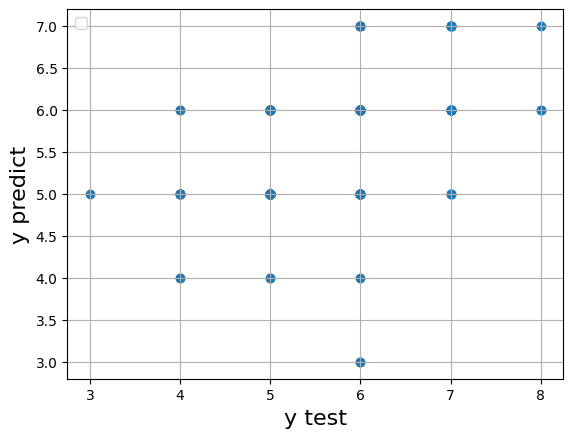

In [72]:
plt.scatter(y_test, y_poly2_predicted)
plt.xlabel('y test', fontsize = 16)
plt.ylabel("y predict", fontsize = 16, rotation = 90)
plt.legend(loc = "upper left", fontsize = 11)
plt.grid(True)
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


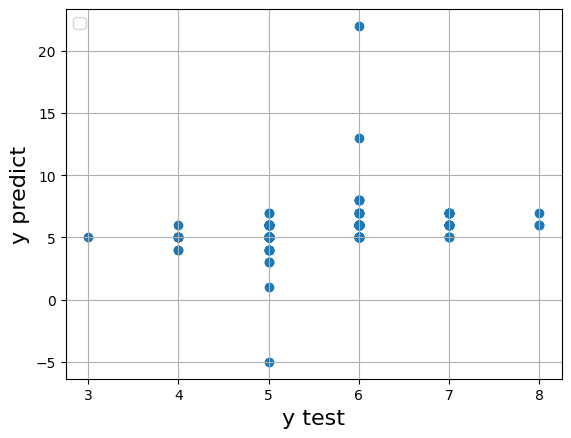

In [74]:
plt.scatter(y_test, y_poly3_predicted)
plt.xlabel('y test', fontsize = 16)
plt.ylabel("y predict", fontsize = 16, rotation = 90)
plt.legend(loc = "upper left", fontsize = 11)
plt.grid(True)
plt.show()